#### Install and import dependencies


In [1]:
!pip3 install torch torchvision torchaudio


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
!git clone https://github.com/ultralytics/yolov5 

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [15]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

#### Load Model

In [6]:
!pip install --upgrade torch torchvision


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
!pip install certifi


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [407]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/janet/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-23 Python-3.9.6 torch-1.13.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [421]:
#img="https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61n7imVeqqL._AC_SL1500_.jpg"
img = os.path.join('data', 'images', 'images (76).jpeg')
results = model(img)
results.print()

image 1/1: 174x290 (no detections)
Speed: 16.2ms pre-process, 371.2ms inference, 1.5ms NMS per image at shape (1, 3, 384, 640)


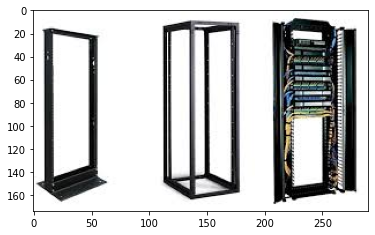

In [422]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

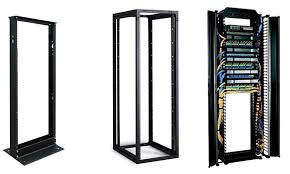

In [423]:
results.show()

In [ ]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame= cap.read()
    
    #Maker detection
    results=model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    cap.release
    cv2.destroyAllWindows()

#### Training data from scratch

In [1]:
import uuid
import os
import time

In [2]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [16]:
import os
#os.getcwd()
#os.chdir('/Users/janet/Downloads/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/image_detect/yolov5')

In [17]:
os.getcwd()

'/Users/janet/Downloads/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/image_detect'

In [26]:
pip install pyyaml

Note: you may need to restart the kernel to use updated packages.


In [3]:
!python3 train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirements "scipy>=1.4.1" "thop>=0.1.1" "setuptools>=65.5.1" not found, attempting AutoUpdate...

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

requirements: 3 packages updated per /Users/janet/Downloads/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/image

In [10]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/janet/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-3-23 Python-3.9.6 torch-1.13.1 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [9]:
pwd

'/Users/janet/Downloads/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/image_detect'

In [43]:
os.chdir('/Users/janet/Downloads/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/image_detect')

In [403]:
img = os.path.join('data', 'images', 'images(90).jpeg')
#img="https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61n7imVeqqL._AC_SL1500_.jpg"

In [404]:
results = model(img)

In [405]:
results.print()

image 1/1: 168x300 2 laptops, 1 satellite dish
Speed: 13.7ms pre-process, 267.3ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


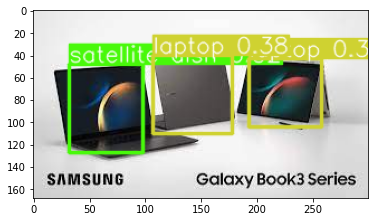

In [406]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [126]:
/Users/janet/Downloads/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/image_detect/yolov5/runs/train/exp2

NameError: name 'Users' is not defined